# Loss Functions and Evaluation Metrics for Regression

This notebook gives an overview of the most common **loss functions** (used in training)
and **evaluation metrics** (used after training) for regression models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Loss Functions

Loss functions are optimized during training to fit a model. They define how errors are penalized.

- **Mean Squared Error (MSE):**  
  $$L(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y_i})^2$$ 

  - Squared penalty makes large errors dominate. Sensitive to outliers.

- **Mean Absolute Error (MAE):**  
  $$L(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^n |y_i - \hat{y}_i|$$ 

  - Linear penalty. More robust to outliers.

- **Huber Loss:**  
  $$
  L(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^n \begin{cases}
  \frac{1}{2} {\left(y_i - \hat{y}_i\right)}^2                   & \text{for } \left|y_i - \hat{y}_i\right| \le \delta, \\[4pt]
  \delta\ \cdot \left(\left|y_i - \hat{y_i}\right| - \frac{1}{2}\delta\right), & \text{otherwise.}
  \end{cases}
  $$

    - Quadratic near 0, linear for large residuals.  
    - Balances robustness and differentiability. Requires a cutoff parameter $\delta$.


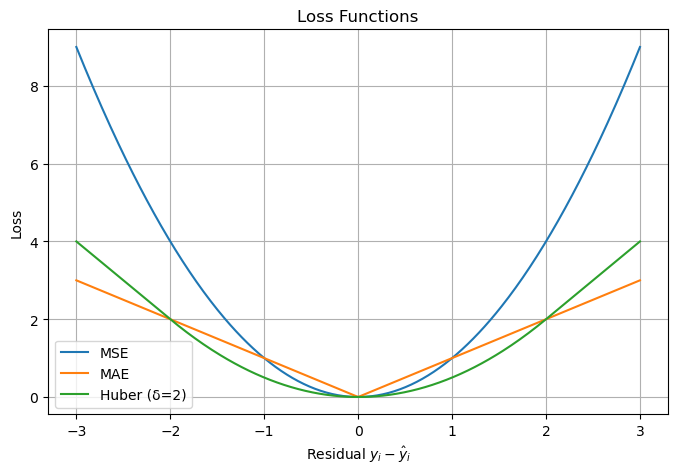

In [2]:
# Plot to visualize differences in loss functions

residuals = np.linspace(-3, 3, 400)
delta_val = 2

def huber_loss(r, delta):
    return np.where(np.abs(r) <= delta, 0.5*r**2, delta*(np.abs(r) - 0.5*delta))

plt.figure(figsize=(8,5))
plt.plot(residuals, residuals**2, label="MSE")
plt.plot(residuals, np.abs(residuals), label="MAE")
plt.plot(residuals, huber_loss(residuals, delta_val), label=f"Huber (δ={delta_val})")
plt.title("Loss Functions")
plt.xlabel("Residual $y_i - \\hat{y}_i$")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

## Evaluation Metrics for Regression
Evaluation metrics are used to **evaluate** the performance of a model after training. Not all evaluation metrics are suitable as loss functions for training a model.  Generally we look record many different evaluation metrics for each model we build to get a more complete picture of the performance of the model.

##### Some Standard Evaluation Metrics

- **Mean Squared Error (MSE):**  
  Average squared error. Penalizes large deviations heavily.  
  If the model is unbiased and errors are homoscedastic (same variance across inputs), then MSE estimates that error variance. In general, MSE = variance of the errors + squared bias.  

  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
  $$

- **Root Mean Squared Error (RMSE):**  
  Square root of MSE, so it is on the same scale (and uses the same units) as the target variable.  
  Under the same conditions (unbiased, homoscedastic errors), RMSE approximates the standard deviation of the errors.  

  $$
  \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
  $$

- **Mean Absolute Error (MAE):**  
  Average absolute error. Always in the same units as the target.  
  More robust to outliers than MSE, though less efficient if errors are truly Gaussian.  

  $$
  \text{MAE} = \frac{1}{n} \sum_{i=1}^n \lvert y_i - \hat{y}_i \rvert
  $$

- **Median Absolute Error:**  
  Median of absolute errors. Extremely robust to outliers and heavy-tailed noise.  
  Less efficient than MAE when errors are symmetric and light-tailed.  

  $$
  \text{MedAE} = \operatorname{median}_{i=1,\dots,n} \big( \lvert y_i - \hat{y}_i \rvert \big)
  $$

- **Mean Absolute Percentage Error (MAPE):**  
  Average percentage error. Intuitive to interpret (e.g., “on average predictions are off by 12%”).  
  However, it is undefined if any $y_i = 0$, and it can be dominated by small target values. Alternatives like SMAPE or log-based errors are sometimes preferred.  

  $$
  \text{MAPE} = \frac{100}{n} \sum_{i=1}^n \left\lvert \frac{y_i - \hat{y}_i}{y_i} \right\rvert
  $$

- **$R^2$ Score:**  
  Proportion of variance in the target explained by the model relative to a baseline predictor.  
  $R^2$ can be negative if the model performs worse than the baseline.  

  - *In-Sample $R^2$:*
    $$
    R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
    $$
    where $\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$.  

  - *Out-of-Sample $R^2$:*
    $$
    R^2_{\text{out}} = 1 - \frac{\sum_{i=1}^{n_{\text{test}}} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n_{\text{test}}} (y_i - \bar{y}_{\text{train}})^2}
    $$
    where $\bar{y}_{\text{train}}$ is the training mean.  
    *Note: scikit-learn’s `r2_score` instead uses the test mean as the baseline when applied to test data.*

  - $R^2$ should be used with extreme caution:  see https://stats.stackexchange.com/a/13317 for a discussion.  Also Cosma Shalizi's free books both have a nice discussion of the dangers of $R^2$.

##### Problem or Industry Specific Metrics

Do research into the metrics which are used in your particular industry.  For instance, in predictive modeling for solar energy we don't only care about RMSE but also the mean bias of our predictions $\sum_i (\hat{y}_i - y_i)$. Here over-predictions cancel out under-predictions.  If this mean bias is positive, then our model tends to over-predict.

To give a taste of the nuances involved in picking which metric to track for a given problem check out this article on click through rate model evaluation metrics:  https://ledovsky.substack.com/p/metrics-for-ads-ctr-models

